In [1]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import ensemble
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#downloading data by NFL season

pbp_2009 = pd.read_csv('reg_pbp_2009.csv')
pbp_2010 = pd.read_csv('reg_pbp_2010.csv')
pbp_2011 = pd.read_csv('reg_pbp_2011.csv')
pbp_2012 = pd.read_csv('reg_pbp_2012.csv')
pbp_2013 = pd.read_csv('reg_pbp_2013.csv')
pbp_2014 = pd.read_csv('reg_pbp_2014.csv')
pbp_2015 = pd.read_csv('reg_pbp_2015.csv')
pbp_2016 = pd.read_csv('reg_pbp_2016.csv')
pbp_2017 = pd.read_csv('reg_pbp_2017.csv')
pbp_2018 = pd.read_csv('reg_pbp_2018.csv')
pbp_2019 = pd.read_csv('reg_pbp_2019_full.csv')

In [16]:
pbp_2018.tail()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
45151,4261,2018123011,TEN,IND,TEN,home,IND,TEN,72.0,2018-12-30,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
45152,4288,2018123011,TEN,IND,IND,away,TEN,TEN,8.0,2018-12-30,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
45153,4310,2018123011,TEN,IND,IND,away,TEN,TEN,9.0,2018-12-30,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
45154,4332,2018123011,TEN,IND,IND,away,TEN,TEN,10.0,2018-12-30,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
45155,4354,2018123011,TEN,IND,NaN,NaN,NaN,TEN,NaN,2018-12-30,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#concatenating the data together
pbp_test = pd.concat([pbp_2009, pbp_2010,pbp_2011,pbp_2012,pbp_2013,pbp_2014,pbp_2015,pbp_2016,pbp_2017,
                     pbp_2018,pbp_2019], axis=0,ignore_index=True)

In [5]:
pbp_test.tail()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
498388,3955,2019122915,SEA,SF,SEA,home,SF,SF,5.0,2019-12-29,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
498389,3977,2019122915,SEA,SF,SEA,home,SF,SF,5.0,2019-12-29,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
498390,3999,2019122915,SEA,SF,SEA,home,SF,SF,5.0,2019-12-29,...,NaN,NaN,NaN,1,upheld,NaN,0.0,0.0,0.0,0.0
498391,4080,2019122915,SEA,SF,SF,away,SEA,SF,99.0,2019-12-29,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
498392,4101,2019122915,SEA,SF,NaN,NaN,NaN,SF,NaN,2019-12-29,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(pbp_test)

498393

In [7]:
#looking at all the data columns to find features
for col in pbp_test.columns: 
    print(col) 

play_id
game_id
home_team
away_team
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa
total_away_rush_epa
total_home_pass_epa
total_away_pass_e

In [29]:
#cleaning data 
df = pbp_test[['game_date', 'posteam','yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','play_type','score_differential','shotgun','no_huddle']]

df = df.dropna()

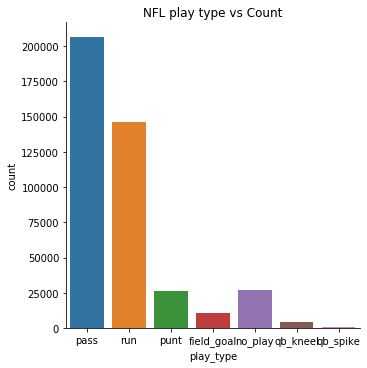

In [30]:
sns.catplot(x='play_type', kind='count', data=df, orient='h')
plt.title('NFL play type vs Count')
plt.show()

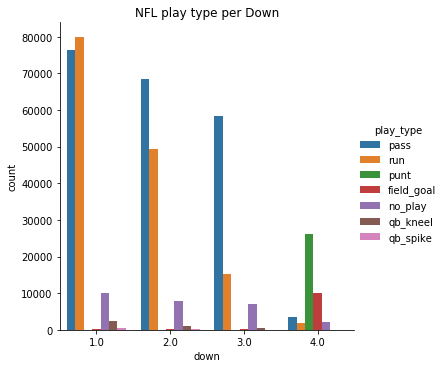

In [31]:
sns.catplot(x="down", kind="count", hue='play_type', data=df);
plt.title('NFL play type per Down')
plt.show()

# remove special teams and kneels/spikes

In [32]:
df = df[~df['play_type'].str.contains("qb_kneel")]
df = df[~df['play_type'].str.contains("qb_spike")]
df = df[~df['play_type'].str.contains("no_play")]
df = df[~df['play_type'].str.contains("punt")]
df = df[~df['play_type'].str.contains("field_goal")]

In [33]:
len(df)

353095

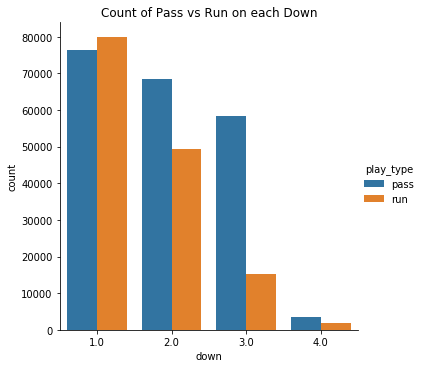

In [35]:
sns.catplot(x="down", kind="count", hue='play_type', data=df)
plt.title('Count of Pass vs Run on each Down')
plt.show()

In [36]:
df['BinaryPlayType'] = df['play_type'].map(lambda p: 1 if p == 'pass' else 0)

In [37]:
len(df['BinaryPlayType'])

353095

In [38]:
print(df['BinaryPlayType'].head())

1    1
2    0
3    1
5    0
6    1
Name: BinaryPlayType, dtype: int64


In [39]:
df['BinaryPlayType'].value_counts()

1    206594
0    146501
Name: BinaryPlayType, dtype: int64

In [40]:
209542/(209542+200658)

# this means a base model has close to a 50% accuracy. 

0.5108288639687957

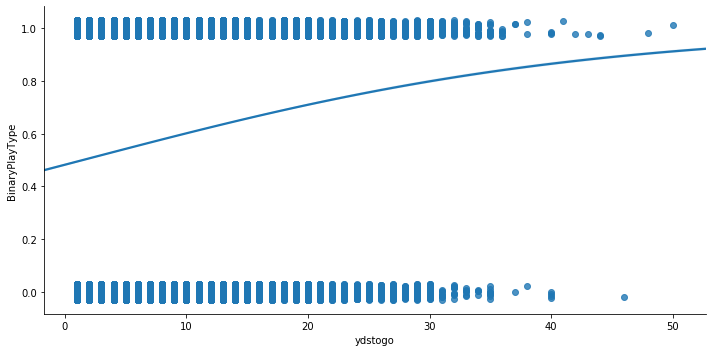

In [41]:
sns.lmplot(x="ydstogo", y="BinaryPlayType", data=df, y_jitter=.03, logistic=True, aspect=2);

plt.show()

#plot data and regriossion model fits across facetgrid 



### Plot above shows that as the yards to go increases the more teams heavily rely on passing plays. This makes sense as run plays are used for short yardage situations. Even though there are run plays in high yardage situations these could be done for lows risk play to eventually punt the ball without throwing a high risk passing play that could result in a turnover

In [42]:
training_df = df[(~df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

testing_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

In [43]:
training_df.tail()

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,BinaryPlayType
450985,2018-12-30,NE,27.0,263.0,263.0,263.0,4,1.0,0.0,10,run,27.0,0,0,0
450986,2018-12-30,NE,19.0,227.0,227.0,227.0,4,2.0,0.0,2,pass,27.0,0,0,1
450988,2018-12-30,NE,17.0,216.0,216.0,216.0,4,1.0,0.0,15,pass,27.0,1,0,1
450989,2018-12-30,NE,5.0,210.0,210.0,210.0,4,2.0,0.0,3,pass,27.0,0,0,1
450997,2018-12-30,NE,90.0,135.0,135.0,135.0,4,1.0,0.0,10,run,34.0,0,0,0


In [44]:
(len(training_df))

10583

In [45]:
testing_df.head()

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,BinaryPlayType
455194,2019-09-08,NE,80.0,896.0,1796.0,3596.0,1,1.0,0.0,10,run,0.0,0,0,0
455195,2019-09-08,NE,81.0,857.0,1757.0,3557.0,1,2.0,0.0,11,run,0.0,0,0,0
455196,2019-09-08,NE,74.0,823.0,1723.0,3523.0,1,3.0,0.0,4,run,0.0,1,0,0
455197,2019-09-08,NE,65.0,794.0,1694.0,3494.0,1,1.0,0.0,10,run,0.0,0,0,0
455198,2019-09-08,NE,62.0,763.0,1663.0,3463.0,1,2.0,0.0,7,run,0.0,0,0,0


In [46]:
len(testing_df)

1072

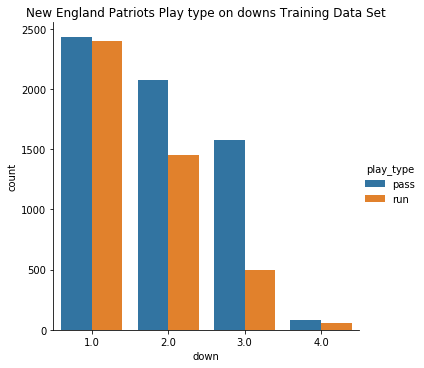

In [51]:
sns.catplot(x="down", kind="count", hue='play_type', data=training_df);
plt.title("New England Patriots Play type on downs Training Data Set")
plt.show()

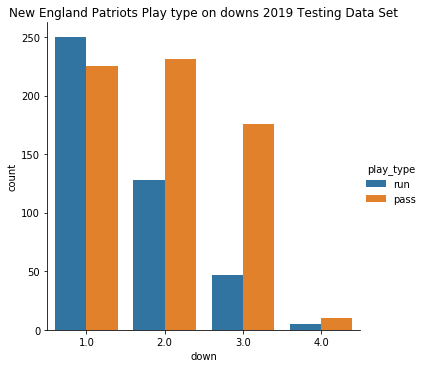

In [52]:
sns.catplot(x="down", kind="count", hue='play_type', data=testing_df);
plt.title("New England Patriots Play type on downs 2019 Testing Data Set")

plt.show()

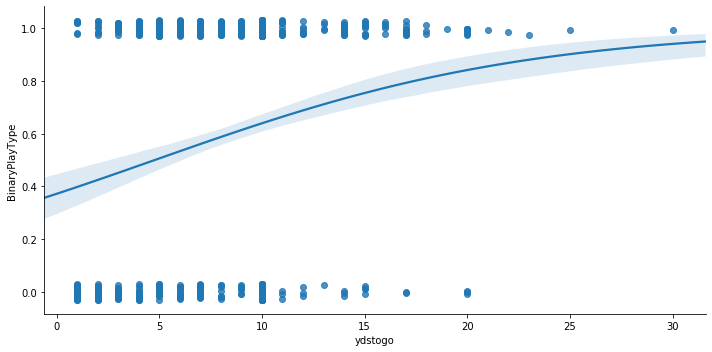

In [60]:
sns.lmplot(x="ydstogo", y="BinaryPlayType", data=testing_df, y_jitter=.03, logistic=True, aspect=2);
plt.show()

# Using Gradient Boosting to Predict plays for New England Patriots

In [53]:
training_features = training_df[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]

training_label = training_df['play_type']

testing_features = testing_df[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]

testing_label = testing_df['play_type']

In [54]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.02)

gbr.fit(training_features, training_label)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
prediction = gbr.predict(testing_features)

accuracy = accuracy_score(testing_label, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 76.12%


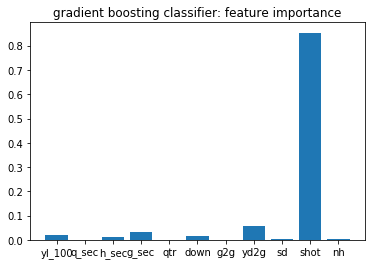

In [56]:
features = ['yl_100', 'q_sec', 'h_sec', 'g_sec', 'qtr', 'down' ,'g2g', 'yd2g', 'sd', 'shot', 'nh'] 

feature_importance = gbr.feature_importances_.tolist()

plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

In [57]:

shotgun_df = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 1)]


In [58]:
shotgun_df.head()

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,BinaryPlayType
455196,2019-09-08,NE,74.0,823.0,1723.0,3523.0,1,3.0,0.0,4,run,0.0,1,0,0
455199,2019-09-08,NE,65.0,726.0,1626.0,3426.0,1,3.0,0.0,10,pass,0.0,1,0,1
455209,2019-09-08,NE,82.0,474.0,1374.0,3174.0,1,1.0,0.0,10,pass,0.0,1,0,1
455210,2019-09-08,NE,82.0,470.0,1370.0,3170.0,1,2.0,0.0,10,pass,0.0,1,0,1
455212,2019-09-08,NE,75.0,434.0,1334.0,3134.0,1,1.0,0.0,20,run,0.0,1,0,0


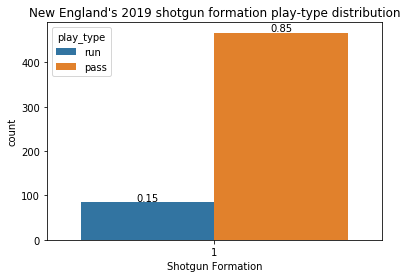

In [59]:
ax = sns.countplot(x="shotgun",hue='play_type', data=shotgun_df)
plt.title("New England's 2019 shotgun formation play-type distribution")
plt.xlabel('Shotgun Formation')

total = len(shotgun_df)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,'{:1.2f}'.format(height/total),ha="center") 

plt.show()

# New England QB Target Distribution

## New England's QB Tom Brady targets Julian Edelman and James White the most according to NFL.com. The goal is to find where and when they are targeted to get a better look into the Patriots offense

In [61]:
target = pbp_test[['game_date','posteam','play_type','desc','down','ydstogo','score_differential','shotgun','no_huddle']]

target = target.dropna()

In [62]:
target.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
1,2009-09-10,PIT,pass,(14:53) B.Roethlisberger pass short left to H....,1.0,10,0.0,0,0
2,2009-09-10,PIT,run,(14:16) W.Parker right end to PIT 44 for -3 ya...,2.0,5,0.0,0,0
3,2009-09-10,PIT,pass,(13:35) (Shotgun) B.Roethlisberger pass incomp...,3.0,8,0.0,1,0
4,2009-09-10,PIT,punt,(13:27) (Punt formation) D.Sepulveda punts 54 ...,4.0,8,0.0,0,0
5,2009-09-10,TEN,run,(13:16) C.Johnson up the middle to TEN 2 for n...,1.0,10,0.0,0,0


In [63]:
len(target)

422062

In [142]:
NE_target_2019 = target[(target.game_date.str.contains('2019')) & (target.posteam == 'NE') & (target.down.isin(range(1,5))) & ((target.play_type == 'run') | (target.play_type == 'pass'))]


In [143]:
len(NE_target_2019)

1072

In [144]:
NE_target_2019.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455194,2019-09-08,NE,run,(14:56) NE 12-Brady 4th player all-time to spe...,1.0,10,0.0,0,0
455195,2019-09-08,NE,run,(14:17) B.Bolden right end pushed ob at NE 26 ...,2.0,11,0.0,0,0
455196,2019-09-08,NE,run,(13:43) (Shotgun) J.White right end pushed ob ...,3.0,4,0.0,1,0
455197,2019-09-08,NE,run,(13:14) S.Michel left tackle to NE 38 for 3 ya...,1.0,10,0.0,0,0
455198,2019-09-08,NE,run,(12:43) S.Michel right end to NE 35 for -3 yar...,2.0,7,0.0,0,0


In [145]:
Edelman_targets = NE_target_2019[(NE_target_2019.desc.str.contains('to J.Edelman'))]
White_targets = NE_target_2019[(NE_target_2019.desc.str.contains('to J.White'))]

In [146]:
Edelman_targets.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455199,2019-09-08,NE,pass,(12:06) (Shotgun) T.Brady pass incomplete deep...,3.0,10,0.0,1,0
455209,2019-09-08,NE,pass,(7:54) (Shotgun) T.Brady pass incomplete short...,1.0,10,0.0,1,0
455232,2019-09-08,NE,pass,(13:49) (Shotgun) T.Brady pass short middle to...,1.0,10,7.0,1,0
455256,2019-09-08,NE,pass,(5:17) T.Brady pass short middle to J.Edelman ...,1.0,10,10.0,0,0
455257,2019-09-08,NE,pass,(4:35) T.Brady pass short left to J.Edelman to...,1.0,10,10.0,0,0


In [115]:
White_targets.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455215,2019-09-08,NE,pass,"(5:35) (No Huddle, Shotgun) J.Edelman pass sho...",1.0,10,0.0,1,1
455226,2019-09-08,NE,pass,(1:32) (Shotgun) T.Brady pass short right to J...,1.0,10,7.0,1,0
455235,2019-09-08,NE,pass,(12:32) T.Brady pass short right to J.White to...,1.0,9,7.0,0,0
455246,2019-09-08,NE,pass,(9:22) (Shotgun) T.Brady pass incomplete short...,3.0,7,10.0,1,0
455255,2019-09-08,NE,pass,(5:53) T.Brady pass short left to J.White to N...,3.0,3,10.0,0,0


In [97]:
len(Edelman_targets)  #Edelman is the clear #1 WR

150

In [98]:
len(White_targets)

97

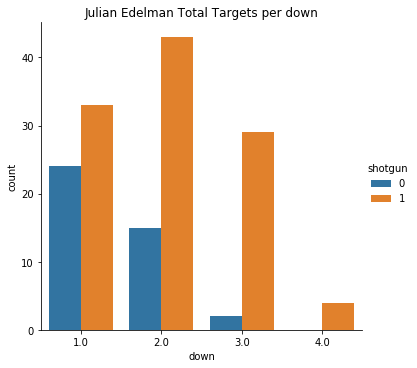

In [99]:
sns.catplot(x="down", kind="count", hue='shotgun', data=Edelman_targets);
plt.title('Julian Edelman Total Targets per down')
plt.show()

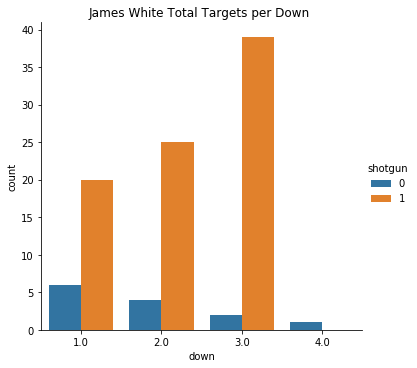

In [100]:
sns.catplot(x="down", kind="count", hue='shotgun', data=White_targets);
plt.title('James White Total Targets per Down ')
plt.show()

##  As we can see from the above graphs, When in shotgun, Julian Edelman is targeted alot especially on second down. This makes sense as most teams put him in double coverage on third down. Because of this James White becomes the go to target on third down. 

# New England Running Back Distribution in 2019

## The main running back for the New England Patriots is Sony Michel. 

In [148]:
Michel_targets = NE_target_2019[(NE_target_2019.desc.str.contains('S.Michel'))]

In [149]:
Michel_targets.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455194,2019-09-08,NE,run,(14:56) NE 12-Brady 4th player all-time to spe...,1.0,10,0.0,0,0
455197,2019-09-08,NE,run,(13:14) S.Michel left tackle to NE 38 for 3 ya...,1.0,10,0.0,0,0
455198,2019-09-08,NE,run,(12:43) S.Michel right end to NE 35 for -3 yar...,2.0,7,0.0,0,0
455227,2019-09-08,NE,run,(:53) S.Michel right guard to PIT 31 for 5 yar...,2.0,6,7.0,0,0
455228,2019-09-08,NE,run,(:32) S.Michel right guard to PIT 29 for 2 yar...,3.0,1,7.0,0,0


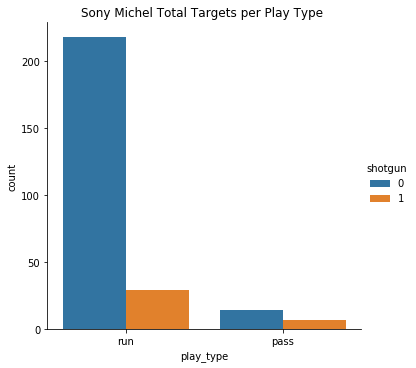

In [109]:
sns.catplot(x="play_type", kind="count", hue='shotgun', data=Michel_targets);
plt.title('Sony Michel Total Targets per Play Type ')
plt.show()

In [150]:

Michel_run = NE_target_2019[(NE_target_2019.desc.str.contains('S.Michel') + NE_target_2019.play_type.str.contains('run'))]


In [151]:
Michel_run.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455194,2019-09-08,NE,run,(14:56) NE 12-Brady 4th player all-time to spe...,1.0,10,0.0,0,0
455195,2019-09-08,NE,run,(14:17) B.Bolden right end pushed ob at NE 26 ...,2.0,11,0.0,0,0
455196,2019-09-08,NE,run,(13:43) (Shotgun) J.White right end pushed ob ...,3.0,4,0.0,1,0
455197,2019-09-08,NE,run,(13:14) S.Michel left tackle to NE 38 for 3 ya...,1.0,10,0.0,0,0
455198,2019-09-08,NE,run,(12:43) S.Michel right end to NE 35 for -3 yar...,2.0,7,0.0,0,0


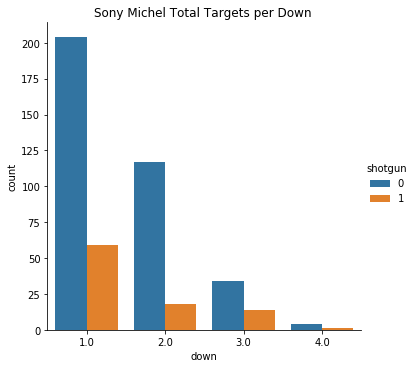

In [112]:
sns.catplot(x="down", kind="count", hue='shotgun', data=Michel_run);
plt.title('Sony Michel Total Targets per Down ')
plt.show()

## And as we can see, Sony is used the most when the patriots are not in shotgun formation. He is used alot on first down situations and then his use decreases as the Patriots start throwing it more on second and third down.

# Lets look at Where New England throws the ball in 2019. 

## This includes incompletions 

In [163]:
short_right = NE_target_2019[(NE_target_2019.desc.str.contains('pass incomplete short right')) + 
                               (NE_target_2019.desc.str.contains('pass short right'))]


short_left = NE_target_2019[(NE_target_2019.desc.str.contains('pass incomplete short left')) + 
                               (NE_target_2019.desc.str.contains('pass short left'))]


short_middle = NE_target_2019[(NE_target_2019.desc.str.contains('pass incomplete short middle')) + 
                               (NE_target_2019.desc.str.contains('pass short middle'))]

In [164]:
deep_right = NE_target_2019[(NE_target_2019.desc.str.contains('pass incomplete deep right')) + 
                               (NE_target_2019.desc.str.contains('pass deep right'))]


deep_left = NE_target_2019[(NE_target_2019.desc.str.contains('pass incomplete deep left')) + 
                               (NE_target_2019.desc.str.contains('pass deep left'))]


deep_middle = NE_target_2019[(NE_target_2019.desc.str.contains('pass incomplete deep middle')) + 
                               (NE_target_2019.desc.str.contains('pass deep middle'))]

In [165]:
deep_right.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455258,2019-09-08,NE,pass,(3:54) (Shotgun) T.Brady pass deep right to P....,1.0,10,10.0,1,0
455272,2019-09-08,NE,pass,"(1:03) (No Huddle, Shotgun) T.Brady pass incom...",2.0,5,17.0,1,1
455299,2019-09-08,NE,pass,(8:13) (Shotgun) T.Brady pass deep right to P....,3.0,10,17.0,1,0
457560,2019-09-15,NE,pass,(10:21) (Shotgun) T.Brady pass incomplete deep...,2.0,5,13.0,1,0
457626,2019-09-15,NE,pass,(5:09) (Shotgun) T.Brady pass deep right to R....,1.0,10,37.0,1,0


In [218]:
passing = pbp_test[['game_date','posteam','play_type','pass_location','desc','receiver_player_name','down','ydstogo','score_differential','shotgun','no_huddle']]

passing= passing.dropna()

In [219]:
passing.head()

,game_date,posteam,play_type,pass_location,desc,receiver_player_name,down,ydstogo,score_differential,shotgun,no_huddle
1,2009-09-10,PIT,pass,left,(14:53) B.Roethlisberger pass short left to H....,H.Ward,1.0,10,0.0,0,0
3,2009-09-10,PIT,pass,right,(13:35) (Shotgun) B.Roethlisberger pass incomp...,M.Wallace,3.0,8,0.0,1,0
6,2009-09-10,TEN,pass,left,(12:40) K.Collins pass short left to A.Hall to...,A.Hall,2.0,10,0.0,0,0
9,2009-09-10,PIT,pass,right,(11:24) B.Roethlisberger pass short right to M...,M.Wallace,1.0,10,0.0,0,0
10,2009-09-10,PIT,pass,left,(10:48) B.Roethlisberger pass short left to S....,S.Holmes,2.0,7,0.0,0,0


In [220]:



NE_passing = passing[(passing.game_date.str.contains('2019')) & (passing.posteam == 'NE') & 
                  (passing.down.isin(range(1,5))) &  (passing.play_type == 'pass')]


In [221]:
NE_passing.head()

,game_date,posteam,play_type,pass_location,desc,receiver_player_name,down,ydstogo,score_differential,shotgun,no_huddle
455199,2019-09-08,NE,pass,middle,(12:06) (Shotgun) T.Brady pass incomplete deep...,J.Edelman,3.0,10,0.0,1,0
455209,2019-09-08,NE,pass,left,(7:54) (Shotgun) T.Brady pass incomplete short...,J.Edelman,1.0,10,0.0,1,0
455210,2019-09-08,NE,pass,middle,(7:50) (Shotgun) T.Brady pass short middle to ...,R.Burkhead,2.0,10,0.0,1,0
455214,2019-09-08,NE,pass,left,(5:58) (Shotgun) T.Brady pass short left to P....,P.Dorsett,3.0,5,0.0,1,0
455215,2019-09-08,NE,pass,left,"(5:35) (No Huddle, Shotgun) J.Edelman pass sho...",J.White,1.0,10,0.0,1,1


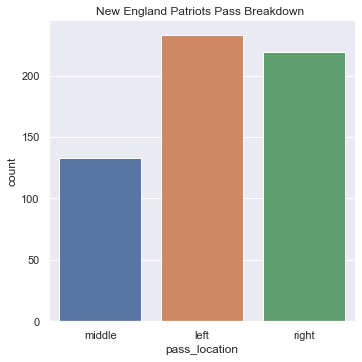

In [281]:
sns.catplot(x="pass_location", kind="count", data=NE_passing);
plt.title('New England Patriots Pass Breakdown ')
plt.show()

In [310]:
print("Number of passes short right:" ,len(short_right)) 
print("Number of passes short left:"    ,len(short_left) )
print("Number of passes short middle:" ,len(short_middle))

Number of passes short right: 200
Number of passes short left: 201
Number of passes short middle: 116


In [311]:
print("Number of passes deep right:" ,len(deep_right)) 
print("Number of passes deep left:"    ,len(deep_left) )
print("Number of passes deep middle:" ,len(deep_middle))

Number of passes deep right: 37
Number of passes deep left: 37
Number of passes deep middle: 23


In [348]:
Edelman_catching = passing[(passing.game_date.str.contains('2019')) & (passing.posteam == 'NE') & 
                  (passing.down.isin(range(1,5))) &  (passing.play_type == 'pass') & 
                           (passing.receiver_player_name == 'J.Edelman')]

White_catching = passing[(passing.game_date.str.contains('2019')) & (passing.posteam == 'NE') & 
                  (passing.down.isin(range(1,5))) &  (passing.play_type == 'pass') & 
                           (passing.receiver_player_name == 'J.White')]

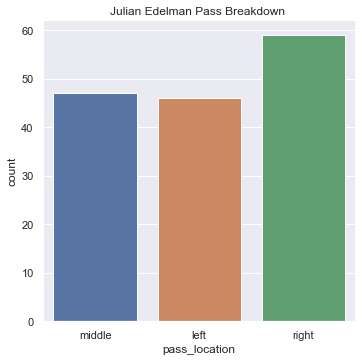

In [350]:
sns.catplot(x="pass_location", kind="count", data=Edelman_catching);
plt.title('Julian Edelman Pass Breakdown ')
plt.show()

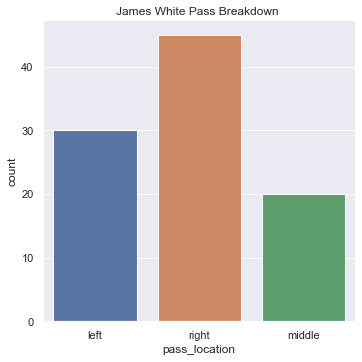

In [351]:
sns.catplot(x="pass_location", kind="count", data=White_catching);
plt.title('James White Pass Breakdown ')
plt.show()

### Patriots pass short right and short left the most as well as equally. 

### The Patriots also pass deep right and left equally. 


# New Orleans Saints Data and Model

In [226]:

training_NO = df[(~df.game_date.str.contains('2019')) & (df.posteam == 'NO') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

testing_NO = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NO') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

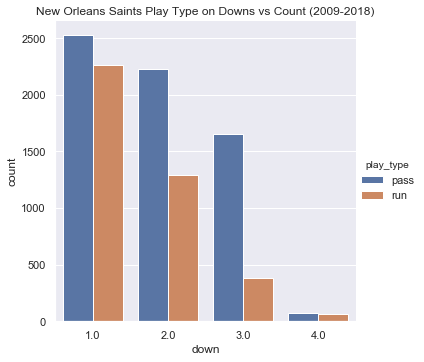

In [314]:
sns.catplot(x="down", kind="count", hue='play_type', data=training_NO);
plt.title('New Orleans Saints Play Type on Downs vs Count (2009-2018)')
plt.show()

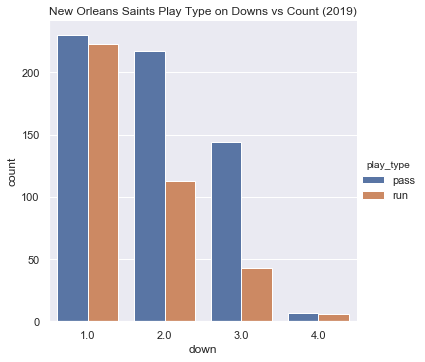

In [315]:
sns.catplot(x="down", kind="count", hue='play_type', data=testing_NO);
plt.title('New Orleans Saints Play Type on Downs vs Count (2019)')

plt.show()

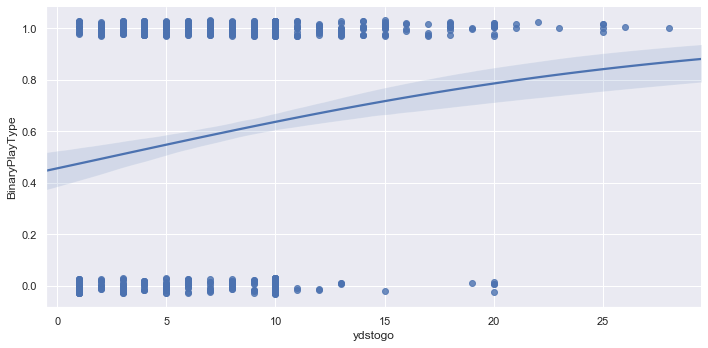

In [229]:
sns.lmplot(x="ydstogo", y="BinaryPlayType", data=testing_NO, y_jitter=.03, logistic=True, aspect=2);
plt.show()

In [230]:
training_features_NO = training_NO[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]

training_label_NO = training_NO['play_type']

testing_features_NO = testing_NO[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]

testing_label_NO = testing_NO['play_type']

In [231]:
gbr_NO = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.02)

gbr_NO.fit(training_features_NO, training_label_NO)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [232]:
prediction_NO = gbr_NO.predict(testing_features_NO)

accuracy_NO = accuracy_score(testing_label_NO, prediction_NO)

print("Accuracy: "+"{:.2%}".format(accuracy_NO))

Accuracy: 75.89%


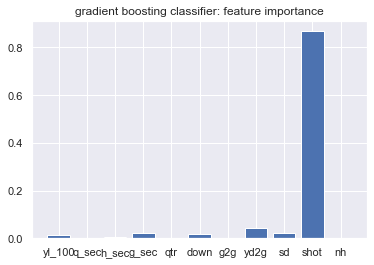

In [233]:
features = ['yl_100', 'q_sec', 'h_sec', 'g_sec', 'qtr', 'down' ,'g2g', 'yd2g', 'sd', 'shot', 'nh'] 

feature_importance = gbr_NO.feature_importances_.tolist()
# the higher the more important the feature 

plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

In [234]:


shotgun_NO = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NO') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 1)]


In [235]:
shotgun_NO.head()

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,BinaryPlayType
455378,2019-09-09,NO,86.0,759.0,1659.0,3459.0,1,1.0,0.0,10,pass,0.0,1,0,1
455379,2019-09-09,NO,77.0,719.0,1619.0,3419.0,1,2.0,0.0,1,pass,0.0,1,0,1
455380,2019-09-09,NO,53.0,683.0,1583.0,3383.0,1,1.0,0.0,10,pass,0.0,1,0,1
455382,2019-09-09,NO,49.0,598.0,1498.0,3298.0,1,3.0,0.0,6,pass,0.0,1,0,1
455389,2019-09-09,NO,49.0,417.0,1317.0,3117.0,1,1.0,0.0,10,run,0.0,1,0,0


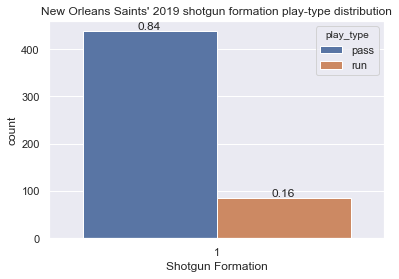

In [236]:
ax = sns.countplot(x="shotgun",hue='play_type', data=shotgun_NO)
plt.title("New Orleans Saints' 2019 shotgun formation play-type distribution")
plt.xlabel('Shotgun Formation')

total = len(shotgun_NO)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,'{:1.2f}'.format(height/total),ha="center") 

plt.show()

### These colors/columns are switched because pass is the first data entry in the saints data where as run is the first data entry in the Patriots data. 

# New Orleans Saints QB Target Distribution

In [237]:
Saints_target = target[(target.game_date.str.contains('2019')) & (target.posteam == 'NO') & (target.down.isin(range(1,5))) & ((target.play_type == 'run') | (target.play_type == 'pass'))]
Saints_target.tail()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
496751,2019-12-29,NO,run,(12:50) W.Clapp reported in as eligible. D.Wa...,2.0,11,32.0,0,0
496752,2019-12-29,NO,pass,(12:17) (Shotgun) T.Bridgewater sacked at NO 3...,3.0,8,32.0,1,0
496761,2019-12-29,NO,run,(8:33) W.Clapp reported in as eligible. L.Mur...,1.0,10,32.0,0,0
496762,2019-12-29,NO,run,(7:53) L.Murray left guard to NO 24 for -7 yar...,2.0,6,32.0,0,0
496763,2019-12-29,NO,run,(7:09) L.Murray up the middle to NO 31 for 7 y...,3.0,13,32.0,0,0


### Saints top passing targets are Michael Thomas and Alvin Kamara 

In [284]:
Thomas_targets = Saints_target[(Saints_target.desc.str.contains('to M.Thomas'))] #WR
Kamara_targets = Saints_target[(Saints_target.desc.str.contains('to A.Kamara'))] #RB
Cook_targets = Saints_target[(Saints_target.desc.str.contains('to J.Cook'))] #TE
Ginn_targets = Saints_target[(Saints_target.desc.str.contains('to T.Ginn'))] #WR

In [285]:
print(len(Thomas_targets))

185


In [286]:
len(Ginn_targets)

55

In [287]:
print(len(Kamara_targets))

96


In [288]:
print(len(Cook_targets))

64


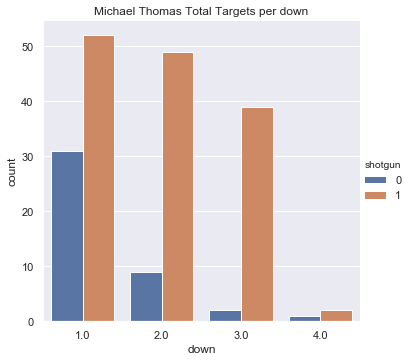

In [289]:
sns.catplot(x="down", kind="count", hue='shotgun', data=Thomas_targets);
plt.title('Michael Thomas Total Targets per down')
plt.show()

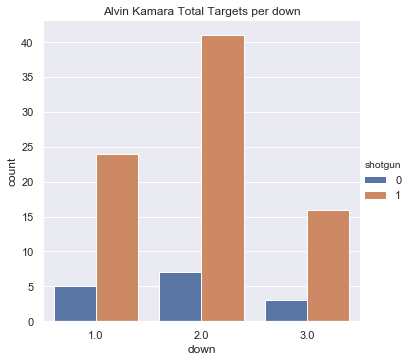

In [290]:
sns.catplot(x="down", kind="count", hue='shotgun', data=Kamara_targets);
plt.title('Alvin Kamara Total Targets per down')
plt.show()

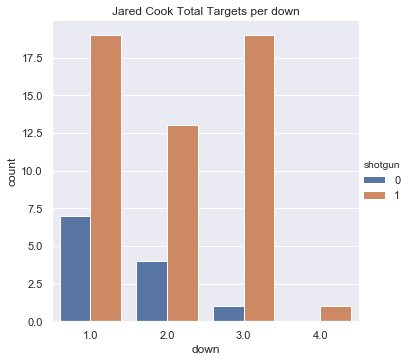

In [291]:
sns.catplot(x="down", kind="count", hue='shotgun', data=Cook_targets);
plt.title('Jared Cook Total Targets per down')
plt.show()

# Michael Thomas is one of the best WRs in the NFL currently and had a record season this year. So it is no surprise that the saints lean on him heavily. 

# In shotgun, the Saints look for Thomas pretty much on every down and Alvin Kamara, their pass catching RB, has been targeted alot on second down

# New Orleans Saints Pass Breakdown

In [352]:
NO_passing = passing[(passing.game_date.str.contains('2019')) & (passing.posteam == 'NO') & 
                  (passing.down.isin(range(1,5))) &  (passing.play_type == 'pass')]

In [356]:
Thomas_catching = passing[(passing.game_date.str.contains('2019')) & (passing.posteam == 'NO') & 
                  (passing.down.isin(range(1,5))) &  (passing.play_type == 'pass')
                         & (passing.receiver_player_name == 'M.Thomas')]

Kamara_catching = passing[(passing.game_date.str.contains('2019')) & (passing.posteam == 'NO') & 
                  (passing.down.isin(range(1,5))) &  (passing.play_type == 'pass')
                         & (passing.receiver_player_name == 'A.Kamara')]

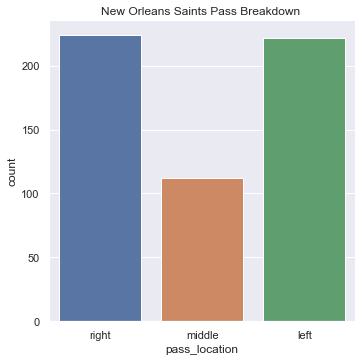

In [357]:
sns.catplot(x="pass_location", kind="count", data=NO_passing);
plt.title('New Orleans Saints Pass Breakdown ')
plt.show()

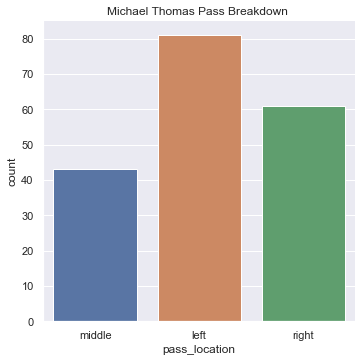

In [359]:
sns.catplot(x="pass_location", kind="count", data=Thomas_catching);
plt.title('Michael Thomas Pass Breakdown ')
plt.show()

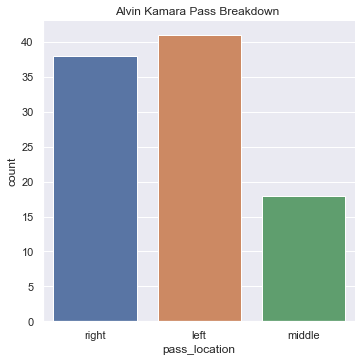

In [360]:
sns.catplot(x="pass_location", kind="count", data=Kamara_catching);
plt.title('Alvin Kamara Pass Breakdown ')
plt.show()

# New Orleans Running Back Distribution

In [292]:

Saints_run = Saints_target[(Saints_target.play_type.str.contains('run'))]
Kamara_run = Saints_run[(Saints_run.desc.str.contains('A.Kamara'))]
Murray_run = Saints_run[(Saints_run.desc.str.contains('L.Murray'))]


In [293]:
Saints_run.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455389,2019-09-09,NO,run,(6:57) (Shotgun) A.Kamara left tackle to HOU 4...,1.0,10,0.0,1,0
455392,2019-09-09,NO,run,(5:48) A.Kamara left end to HOU 27 for 1 yard ...,1.0,10,0.0,0,0
455395,2019-09-09,NO,run,(3:39) L.Murray left guard to HOU 11 for 5 yar...,1.0,10,0.0,0,0
455413,2019-09-09,NO,run,(12:22) A.Kamara left guard to HOU 22 for 5 ya...,1.0,10,-7.0,0,0
455414,2019-09-09,NO,run,(11:43) Lining up at quarterback is #7 T.Hill....,2.0,5,-7.0,1,0


In [294]:
Kamara_run.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455389,2019-09-09,NO,run,(6:57) (Shotgun) A.Kamara left tackle to HOU 4...,1.0,10,0.0,1,0
455392,2019-09-09,NO,run,(5:48) A.Kamara left end to HOU 27 for 1 yard ...,1.0,10,0.0,0,0
455413,2019-09-09,NO,run,(12:22) A.Kamara left guard to HOU 22 for 5 ya...,1.0,10,-7.0,0,0
455414,2019-09-09,NO,run,(11:43) Lining up at quarterback is #7 T.Hill....,2.0,5,-7.0,1,0
455416,2019-09-09,NO,run,(10:17) A.Kamara left tackle to HOU 14 for 1 y...,1.0,10,-7.0,0,0


In [295]:
Murray_run.head()

,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
455395,2019-09-09,NO,run,(3:39) L.Murray left guard to HOU 11 for 5 yar...,1.0,10,0.0,0,0
455457,2019-09-09,NO,run,(14:22) L.Murray left tackle to NO 29 for 1 ya...,1.0,10,-11.0,0,0
455460,2019-09-09,NO,run,(12:57) (Shotgun) L.Murray left guard for 30 y...,2.0,10,-11.0,1,0
455477,2019-09-09,NO,run,(7:03) L.Murray right guard to NO 47 for 4 yar...,2.0,3,-11.0,0,0
455509,2019-09-09,NO,run,(9:56) L.Murray right tackle to NO 45 for -1 y...,1.0,10,3.0,0,0


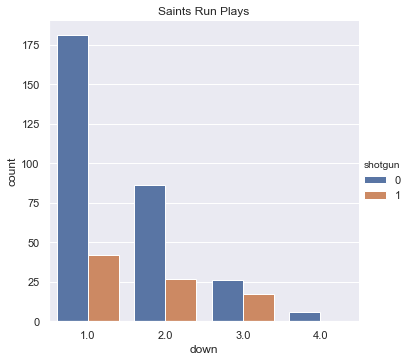

In [296]:
sns.catplot(x="down", kind="count", hue='shotgun', data=Saints_run);
plt.title('Saints Run Plays')
plt.show()

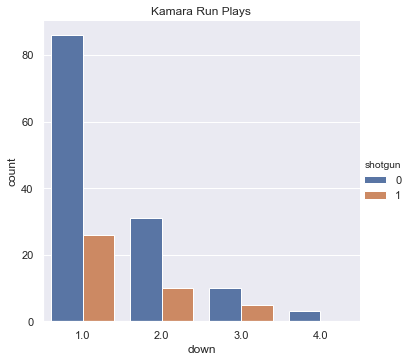

In [300]:
sns.catplot(x="down", kind="count", hue='shotgun', data=Kamara_run);
plt.title('Kamara Run Plays')
plt.show()

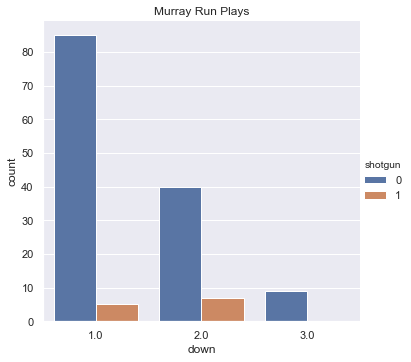

In [299]:
sns.catplot(x="down", kind="count", hue='shotgun', data=Murray_run);
plt.title('Murray Run Plays')
plt.show()

In [316]:
len(Murray_run)

146

In [317]:
len(Kamara_run)

171

### Kamara is used on first down run situations and also some in shotgun ie Draw Plays. But the load of run plays are split between Murray and Kamara. I think this is because Murray is used more for short yard situations and Kamara is used more to keep the defense in more pass defense packages. 

# Using New England Patriots (2009-2018) data to predict New Orleans Saints (2019) 

## I am interested to see if the Patriots training data set can be used to predict New Orleans Saints offensive play calling. As we have learned, they differ in how they spread the ball out and how the run game is distributed. 

In [238]:
training_NE = df[(~df.game_date.str.contains('2019')) & (df.posteam == 'NE') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

testing_NE_NO = df[(df.game_date.str.contains('2019')) & (df.posteam == 'NO') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

In [239]:
testing_NE_NO.head()

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,BinaryPlayType
455378,2019-09-09,NO,86.0,759.0,1659.0,3459.0,1,1.0,0.0,10,pass,0.0,1,0,1
455379,2019-09-09,NO,77.0,719.0,1619.0,3419.0,1,2.0,0.0,1,pass,0.0,1,0,1
455380,2019-09-09,NO,53.0,683.0,1583.0,3383.0,1,1.0,0.0,10,pass,0.0,1,0,1
455381,2019-09-09,NO,50.0,638.0,1538.0,3338.0,1,2.0,0.0,7,pass,0.0,0,0,1
455382,2019-09-09,NO,49.0,598.0,1498.0,3298.0,1,3.0,0.0,6,pass,0.0,1,0,1


In [240]:
training_features_NE = training_NE[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]

training_label_NE = training_NE['play_type']

testing_features_NE_NO = testing_NE_NO[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]

testing_label_NE_NO = testing_NE_NO['play_type']

In [241]:
gbr_NE_NO = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.02)

gbr_NE_NO.fit(training_features_NE, training_label_NE)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [242]:
prediction_NE_NO = gbr_NE_NO.predict(testing_features_NE_NO)

accuracy_NE_NO = accuracy_score(testing_label_NE_NO, prediction_NE_NO)

print("Accuracy: "+"{:.2%}".format(accuracy_NE_NO))

Accuracy: 75.79%


### Using New England (2009-2018) data as training data and New Orleans Saints (2019) data as testing data

### we get a 75.79% accuracy score. This is similar than if we used Saints (2009-2018) data! (75.89%)

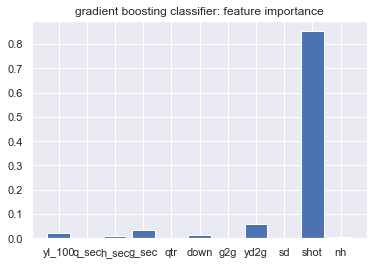

In [244]:
features = ['yl_100', 'q_sec', 'h_sec', 'g_sec', 'qtr', 'down' ,'g2g', 'yd2g', 'sd', 'shot', 'nh'] 

feature_importance = gbr_NE_NO.feature_importances_.tolist()
# the higher the more important the feature 

plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

### Same percentage as using New England data. Lets try all the other teams

In [245]:
df.posteam.unique()
len(df.posteam.unique())

35

In [246]:
df['posteam'].replace('STL','LA',inplace=True)
df['posteam'].replace('SD','LAC',inplace=True)
df['posteam'].replace('JAC','JAX',inplace=True)

len(df.posteam.unique())

32

In [247]:
results = pd.DataFrame(columns =['accuracy'])

for tm in df.posteam.unique():
    
    training_all = df[(~df.game_date.str.contains('2019')) & (df.posteam == tm) & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]
    testing_all = df[(df.game_date.str.contains('2019')) & (df.posteam == tm) & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

    training_features_all = training_all[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]
    training_label_all = training_all['play_type']
    
    testing_features_all = testing_all[['yardline_100','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','goal_to_go','ydstogo','score_differential','shotgun','no_huddle']]
    testing_label_all = testing_all['play_type']
    
    prediction_all = gbr.predict(testing_features_all)
    accuracy_all = accuracy_score(testing_label_all, prediction_all)
   
    results.loc[tm] = [accuracy_all]

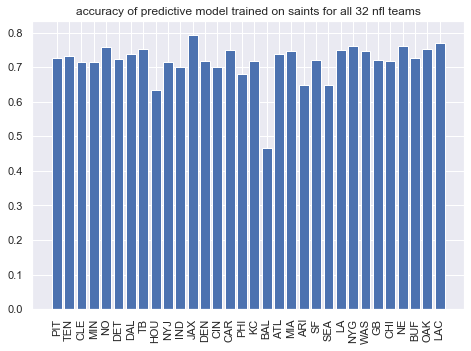

In [248]:
plt.bar(results.index,results.accuracy)
plt.xticks(rotation=90)
plt.title("accuracy of predictive model trained on saints for all 32 nfl teams")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [324]:
Top = results[results['accuracy'] > .75]
Bottom = results[results['accuracy'] < .6]

In [325]:
len(Top)

7

In [326]:
len(Bottom)

1

In [340]:
print(Top.sort_values(by = 'accuracy',ascending=False))

     accuracy
JAX  0.793241
LAC  0.769623
NYG  0.762425
NE   0.761194
NO   0.757884
OAK  0.753579
TB   0.752354


In [253]:
Bottom

,accuracy
BAL,0.465767


### Lets take a look at why Baltimore Ravens performed so poorly and why Jacksonville Jaguars is our highest accuracy!

In [254]:
#training_JAC = df[(~df.game_date.str.contains('2019')) & (df.posteam == 'NO') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]

testing_JAX = df[(df.game_date.str.contains('2019')) & (df.posteam == 'JAX') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]




In [255]:
testing_JAX.head()

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,BinaryPlayType
453926,2019-09-08,JAX,75.0,804.0,1704.0,3504.0,1,1.0,0.0,10,run,-7.0,1,0,0
453927,2019-09-08,JAX,76.0,767.0,1667.0,3467.0,1,2.0,0.0,11,pass,-7.0,1,0,1
453928,2019-09-08,JAX,69.0,718.0,1618.0,3418.0,1,3.0,0.0,4,pass,-7.0,1,0,1
453937,2019-09-08,JAX,75.0,537.0,1437.0,3237.0,1,1.0,0.0,10,pass,-10.0,1,0,1
453939,2019-09-08,JAX,85.0,505.0,1405.0,3205.0,1,2.0,0.0,20,pass,-10.0,1,0,1


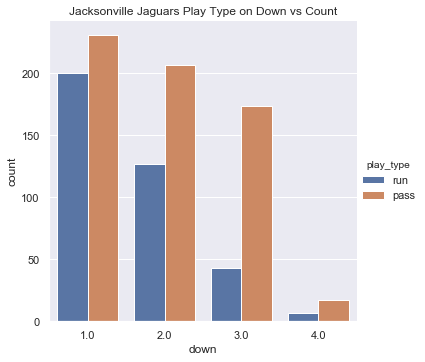

In [318]:
sns.catplot(x="down", kind="count", hue='play_type', data=testing_JAX);
plt.title('Jacksonville Jaguars Play Type on Down vs Count')
plt.show()

In [257]:
shotgun_JAX = df[(df.game_date.str.contains('2019')) & (df.posteam == 'JAX') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 1)]


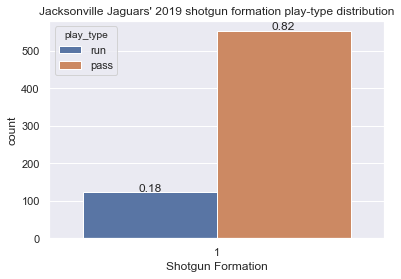

In [258]:
ax = sns.countplot(x="shotgun",hue='play_type', data=shotgun_JAX)
plt.title("Jacksonville Jaguars' 2019 shotgun formation play-type distribution")
plt.xlabel('Shotgun Formation')

total = len(shotgun_JAX)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,'{:1.2f}'.format(height/total),ha="center") 

plt.show()

### This distribution is much more one sided than the Patriots and Saints thus making our model able to predict the play calling more accurately than the other two. 

###  Lets take a look at Baltimore

In [259]:
testing_BAL = df[(df.game_date.str.contains('2019')) & (df.posteam == 'BAL') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass'))]


shotgun_BAL = df[(df.game_date.str.contains('2019')) & (df.posteam == 'BAL') & (df.down.isin(range(1,5))) & ((df.play_type == 'run') | (df.play_type == 'pass')) & (df.shotgun == 1)]


In [260]:
testing_BAL.head()

,game_date,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle,BinaryPlayType
453750,2019-09-08,BAL,89.0,896.0,1796.0,3596.0,1,1.0,0.0,10,run,0.0,1,0,0
453751,2019-09-08,BAL,40.0,849.0,1749.0,3549.0,1,1.0,0.0,10,pass,0.0,1,0,1
453752,2019-09-08,BAL,33.0,813.0,1713.0,3513.0,1,2.0,0.0,3,run,0.0,1,0,0
453753,2019-09-08,BAL,22.0,770.0,1670.0,3470.0,1,1.0,0.0,10,pass,0.0,1,0,1
453754,2019-09-08,BAL,19.0,747.0,1647.0,3447.0,1,2.0,0.0,7,run,0.0,1,0,0


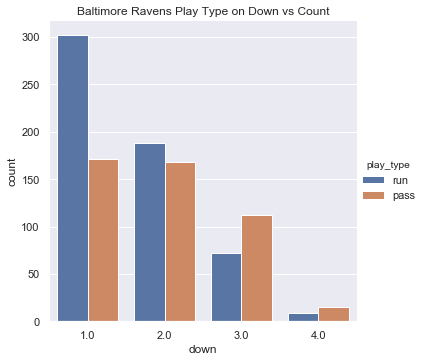

In [319]:
sns.catplot(x="down", kind="count", hue='play_type', data=testing_BAL);
plt.title("Baltimore Ravens Play Type on Down vs Count")
plt.show()

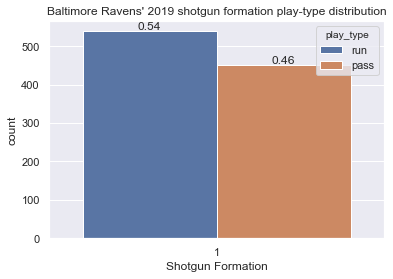

In [262]:
ax = sns.countplot(x="shotgun",hue='play_type', data=shotgun_BAL)
plt.title("Baltimore Ravens' 2019 shotgun formation play-type distribution")
plt.xlabel('Shotgun Formation')

total = len(shotgun_BAL)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    ax.text(p.get_x()+p.get_width()/2.,
    height + 3,'{:1.2f}'.format(height/total),ha="center") 

plt.show()

### This is very interesting. They run more than they pass in shotgun. Certainly not common in the NFL 

In [263]:
Ravens_target = target[(target.game_date.str.contains('2019')) & (target.posteam == 'BAL') & (target.down.isin(range(1,5))) & ((target.play_type == 'run') | (target.play_type == 'pass'))]
Ravens_target.tail()



,game_date,posteam,play_type,desc,down,ydstogo,score_differential,shotgun,no_huddle
497675,2019-12-29,BAL,run,(3:25) (Shotgun) R.Griffin III right guard to ...,3.0,8,18.0,1,0
497676,2019-12-29,BAL,run,(2:41) (Shotgun) G.Edwards right guard to PIT ...,1.0,10,18.0,1,0
497678,2019-12-29,BAL,run,(2:00) (Shotgun) G.Edwards left guard to PIT 4...,2.0,8,18.0,1,0
497679,2019-12-29,BAL,run,(1:17) W.Snead IV right end to PIT 45 for no g...,3.0,6,18.0,0,0
497681,2019-12-29,BAL,pass,(:30) (Shotgun) R.Griffin III pass short middl...,4.0,6,18.0,1,0


In [264]:
shotgun = testing_BAL[testing_BAL['shotgun'] == 1]
other = testing_BAL[testing_BAL['shotgun'] == 0]

print(len(shotgun),len(other))

990 47


Text(0.5, 1.0, 'Baltimore Ravens Shotgun Play Type vs Snap Count')

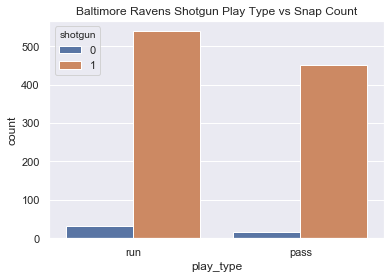

In [265]:
ax = sns.countplot(x="play_type",hue='shotgun', data=testing_BAL)
plt.title('Baltimore Ravens Shotgun Play Type vs Snap Count')

### Ravens are primarily in shotgun formation when they run and pass. So using shotgun formation as the main feature is a disadvantage. 

### Lets compare this with other teams

Text(0.5, 1.0, 'New Orleans Saints Shotgun play type vs snap count')

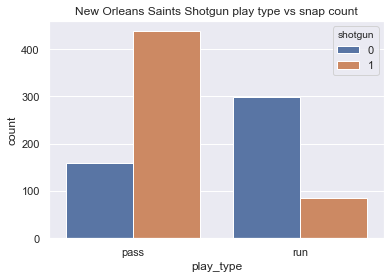

In [266]:
ax = sns.countplot(x="play_type",hue='shotgun', data=testing_NO)
plt.title('New Orleans Saints Shotgun play type vs snap count')

Text(0.5, 1.0, 'New England Patriots Shotgun play type vs snap count')

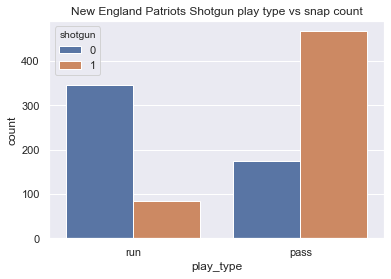

In [267]:
ax = sns.countplot(x="play_type",hue='shotgun', data=testing_df)
plt.title('New England Patriots Shotgun play type vs snap count')#New England

Text(0.5, 1.0, 'Jacksonville Jaguars Shotgun play type vs snap count')

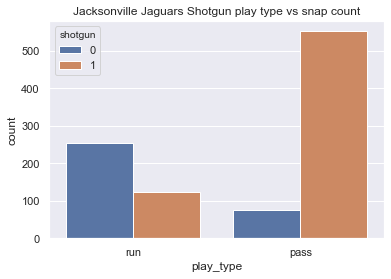

In [268]:
ax = sns.countplot(x="play_type",hue='shotgun', data=testing_JAX)
plt.title('Jacksonville Jaguars Shotgun play type vs snap count')

### As we can see above, The top teams our model predicted are pass heavy in shotgun and run heavy when not in shotgun

# Overall, The model predicted much better than I though and the two teams I chose were some of the highest accuracy out of all. It makes sense that Ravens were so low, their offense is very different from the rest and introducing another feature is needed to increase accuracy to predict their offense as shotgun formation is not enough. 